In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from scipy import sparse
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, ShuffleSplit
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, log_loss
from sklearn.calibration import CalibratedClassifierCV
import xgboost as xgb
import time

In [2]:
# Importing the dataset
traindata = pd.read_csv("data/train.csv")
testdata = pd.read_csv('data/test.csv')

In [3]:
traindata = traindata.dropna()
print(traindata.shape)

(404287, 6)


In [4]:
np.isnan(traindata.any())

id              False
qid1            False
qid2            False
question1       False
question2       False
is_duplicate    False
dtype: bool

In [5]:
traindata.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [6]:
labels = np.array(traindata["is_duplicate"])

In [7]:
features = pd.read_csv("data/train_basic_features.csv")

In [8]:
features.head()

,question1_final,question2_final,q1_char_num,q2_char_num,q1_word_num,q2_word_num,total_word_num,differ_word_num,same_first_word,same_last_word,...,total_unique_word_withoutstopword_num,total_unique_word_num_ratio,common_word_num,common_word_ratio,common_word_ratio_min,common_word_ratio_max,common_word_withoutstopword_num,common_word_withoutstopword_ratio,common_word_withoutstopword_ratio_min,common_word_withoutstopword_ratio_max
0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,65,56,14,12,26,2,1,0,...,6,0.461538,11,0.916667,1.000000,0.916667,5,0.833333,1.0,0.833333
1,what is the story of kohinoor koh i noor diamond,what would happen if the indian government ste...,48,85,10,15,25,5,1,0,...,11,0.680000,7,0.411765,0.700000,0.500000,4,0.363636,0.8,0.400000
2,how can i increase the speed of my internet co...,how can internet speed be increase by hack thr...,70,54,14,10,24,4,1,0,...,8,0.791667,5,0.263158,0.500000,0.357143,3,0.375000,0.6,0.500000
3,why am i mentally very lonely how can i solve it,find the remainder when math 23 24 math is div...,48,58,11,13,24,2,0,0,...,9,0.833333,0,0.000000,0.000000,0.000000,0,0.000000,0.0,0.000000
4,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,73,38,13,7,20,6,1,0,...,13,0.800000,4,0.250000,0.571429,0.307692,2,0.153846,0.4,0.200000


In [9]:
features.drop(["question1_final", "question2_final"], axis=1, inplace=True)
features.head()

,q1_char_num,q2_char_num,q1_word_num,q2_word_num,total_word_num,differ_word_num,same_first_word,same_last_word,total_unique_word_num,total_unique_word_withoutstopword_num,total_unique_word_num_ratio,common_word_num,common_word_ratio,common_word_ratio_min,common_word_ratio_max,common_word_withoutstopword_num,common_word_withoutstopword_ratio,common_word_withoutstopword_ratio_min,common_word_withoutstopword_ratio_max
0,65,56,14,12,26,2,1,0,12,6,0.461538,11,0.916667,1.000000,0.916667,5,0.833333,1.0,0.833333
1,48,85,10,15,25,5,1,0,17,11,0.680000,7,0.411765,0.700000,0.500000,4,0.363636,0.8,0.400000
2,70,54,14,10,24,4,1,0,19,8,0.791667,5,0.263158,0.500000,0.357143,3,0.375000,0.6,0.500000
3,48,58,11,13,24,2,0,0,20,9,0.833333,0,0.000000,0.000000,0.000000,0,0.000000,0.0,0.000000
4,73,38,13,7,20,6,1,0,16,13,0.800000,4,0.250000,0.571429,0.307692,2,0.153846,0.4,0.200000


In [10]:
features.shape

(404287, 19)

In [11]:
np.isnan(features.all())

q1_char_num                              False
q2_char_num                              False
q1_word_num                              False
q2_word_num                              False
total_word_num                           False
differ_word_num                          False
same_first_word                          False
same_last_word                           False
total_unique_word_num                    False
total_unique_word_withoutstopword_num    False
total_unique_word_num_ratio              False
common_word_num                          False
common_word_ratio                        False
common_word_ratio_min                    False
common_word_ratio_max                    False
common_word_withoutstopword_num          False
common_word_withoutstopword_ratio        False
common_word_withoutstopword_ratio_min    False
common_word_withoutstopword_ratio_max    False
dtype: bool

In [12]:
np.isfinite(features.all())

q1_char_num                              True
q2_char_num                              True
q1_word_num                              True
q2_word_num                              True
total_word_num                           True
differ_word_num                          True
same_first_word                          True
same_last_word                           True
total_unique_word_num                    True
total_unique_word_withoutstopword_num    True
total_unique_word_num_ratio              True
common_word_num                          True
common_word_ratio                        True
common_word_ratio_min                    True
common_word_ratio_max                    True
common_word_withoutstopword_num          True
common_word_withoutstopword_ratio        True
common_word_withoutstopword_ratio_min    True
common_word_withoutstopword_ratio_max    True
dtype: bool

In [13]:
features.replace((np.inf, -np.inf), np.nan, inplace=True)

In [14]:
features.fillna(method='bfill', inplace=True)

In [15]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404287 entries, 0 to 404286
Data columns (total 19 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   q1_char_num                            404287 non-null  int64  
 1   q2_char_num                            404287 non-null  int64  
 2   q1_word_num                            404287 non-null  int64  
 3   q2_word_num                            404287 non-null  int64  
 4   total_word_num                         404287 non-null  int64  
 5   differ_word_num                        404287 non-null  int64  
 6   same_first_word                        404287 non-null  int64  
 7   same_last_word                         404287 non-null  int64  
 8   total_unique_word_num                  404287 non-null  int64  
 9   total_unique_word_withoutstopword_num  404287 non-null  int64  
 10  total_unique_word_num_ratio            404287 non-null  

In [16]:
features = features.to_numpy()

In [17]:
scaler = MinMaxScaler()

In [18]:
features = scaler.fit_transform(features)

In [19]:
features

array([[0.11111111, 0.05049594, 0.109375  , ..., 0.83333333, 1.        ,
        0.83333333],
       [0.08205128, 0.07664563, 0.078125  , ..., 0.36363636, 0.8       ,
        0.4       ],
       [0.11965812, 0.04869252, 0.109375  , ..., 0.375     , 0.6       ,
        0.5       ],
       ...,
       [0.02735043, 0.01532913, 0.03125   , ..., 0.5       , 1.        ,
        0.5       ],
       [0.14871795, 0.10820559, 0.1328125 , ..., 0.        , 0.        ,
        0.        ],
       [0.06153846, 0.03967538, 0.0625    , ..., 1.        , 1.        ,
        1.        ]])

Since the dataset is imbalanced, we did oversample by sampling from the minority class.

In [20]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_data, y_data = oversample.fit_resample(features, labels)

In [21]:
print(np.count_nonzero(y_data == 0))
print(np.count_nonzero(y_data == 1))

255024
255024


Now we have 510048 data points. 255024 from each class.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Models Training

## Support Vector Classifier (SVM Classifier)

In [23]:
splits = ShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

In [24]:
svc_param_grid = {'C':[1e-2, 1e-1, 1e0, 1e1, 1e2]}

In [25]:
svc_clf = LinearSVC(penalty='l2', loss='squared_hinge', dual=False, max_iter=3000)

In [26]:
svc_clf_search = HalvingGridSearchCV(svc_clf, svc_param_grid, cv=splits, factor=2, scoring='accuracy', verbose=3)

In [27]:
svc_clf_search.fit(X_train, y_train)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 102009
max_resources_: 408038
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 5
n_resources: 102009
Fitting 1 folds for each of 5 candidates, totalling 5 fits
[CV 1/1] END .........................................C=0.01; total time=   0.4s
[CV 1/1] END ..........................................C=0.1; total time=   0.5s
[CV 1/1] END ..........................................C=1.0; total time=   1.0s
[CV 1/1] END .........................................C=10.0; total time=   1.2s
[CV 1/1] END ........................................C=100.0; total time=   1.1s
----------
iter: 1
n_candidates: 3
n_resources: 204018
Fitting 1 folds for each of 3 candidates, totalling 3 fits
[CV 1/1] END ..........................................C=1.0; total time=   2.1s
[CV 1/1] END ........................................C=100.0; total time=   2.5s
[CV 1/1] END ........................................

HalvingGridSearchCV(cv=ShuffleSplit(n_splits=1, random_state=42, test_size=0.3, train_size=None),
                    estimator=LinearSVC(dual=False, max_iter=3000), factor=2,
                    param_grid={'C': [0.01, 0.1, 1.0, 10.0, 100.0]},
                    refit=<function _refit_callable at 0x0000023DC6EF2EE0>,
                    scoring='accuracy', verbose=3)

In [28]:
svc_clf_search.best_params_

{'C': 1.0}

In [29]:
svc_clf_search.best_score_

0.7041360662032007

In [30]:
svc_clf_model = svc_clf_search.best_estimator_

In [31]:
svc_clf_model

LinearSVC(dual=False, max_iter=3000)

In [32]:
svc_calibrated = CalibratedClassifierCV(base_estimator=svc_clf_model, method="sigmoid", cv=splits)

In [33]:
svc_calibrated.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=LinearSVC(dual=False, max_iter=3000),
                       cv=ShuffleSplit(n_splits=1, random_state=42, test_size=0.3, train_size=None))

### Evaluation

In [34]:
def print_mean_std (acc,p,r,f,auc):
    acc = np.array(acc)
    p = np.array(p)
    r = np.array(r)
    f = np.array(f)
    auc = np.array(auc)

    acc_mean = acc.mean()
    acc_std = acc.std()
    p_mean = p.mean()
    p_std = p.std()
    r_mean = r.mean()
    r_std = r.std()
    f_mean = f.mean()
    f_std = f.std()
    auc_mean = auc.mean()
    auc_std = auc.std()
    print('accuracy_mean, accuracy_std:',acc_mean, acc_std)
    print('precision_mean, precision_std, recall_mean, recall_std, f_mean, f_std:', p_mean, p_std, r_mean, r_std, f_mean, f_std)
    print('AUC_mean, AUC_std:', auc_mean, auc_std)
    return acc_mean, acc_std, p_mean, p_std, r_mean, r_std, f_mean, f_std, auc_mean, auc_std

              precision    recall  f1-score   support

           0       0.73      0.64      0.68     50946
           1       0.68      0.77      0.72     51064

    accuracy                           0.70    102010
   macro avg       0.71      0.70      0.70    102010
weighted avg       0.71      0.70      0.70    102010

accuracy_mean, accuracy_std: 0.7020684246642486 0.0
precision_mean, precision_std, recall_mean, recall_std, f_mean, f_std: 0.6787864111257178 0.0 0.7684866050446498 0.0 0.7208567544729784 0.0
AUC_mean, AUC_std: 0.7019915065030102 0.0


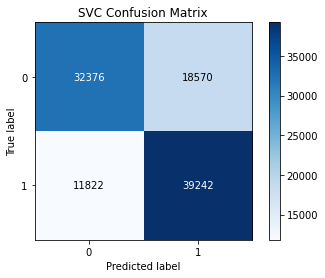

In [35]:
y_pred = svc_calibrated.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1: ", f1_score(y_test, y_pred))
print("ROC AUC: ", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.title('SVC Confusion Matrix')
plt.savefig('graphs/svc_fs1/svc_confusion_matrix.png')

mean_stds = print_mean_std(acc,p,r,f,auc)

## Logistic Regression

In [36]:
lr_param_grid = {'C':[1e-2, 1e-1, 1e0, 1e1, 1e2]}

In [37]:
lr_clf = LogisticRegression(penalty='l2', class_weight='balanced', dual=False, max_iter=3000)

In [38]:
lr_clf_search = HalvingGridSearchCV(lr_clf, lr_param_grid, cv=splits, factor=2, scoring='accuracy', verbose=3)

In [39]:
lr_clf_search.fit(X_train, y_train)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 102009
max_resources_: 408038
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 5
n_resources: 102009
Fitting 1 folds for each of 5 candidates, totalling 5 fits
[CV 1/1] END .........................................C=0.01; total time=   0.1s
[CV 1/1] END ..........................................C=0.1; total time=   0.5s
[CV 1/1] END ..........................................C=1.0; total time=   1.1s
[CV 1/1] END .........................................C=10.0; total time=   2.7s
[CV 1/1] END ........................................C=100.0; total time=   3.8s
----------
iter: 1
n_candidates: 3
n_resources: 204018
Fitting 1 folds for each of 3 candidates, totalling 3 fits
[CV 1/1] END ........................................C=100.0; total time=   9.1s
[CV 1/1] END .........................................C=10.0; total time=   8.8s
[CV 1/1] END ........................................

HalvingGridSearchCV(cv=ShuffleSplit(n_splits=1, random_state=42, test_size=0.3, train_size=None),
                    estimator=LogisticRegression(class_weight='balanced',
                                                 max_iter=3000),
                    factor=2, param_grid={'C': [0.01, 0.1, 1.0, 10.0, 100.0]},
                    refit=<function _refit_callable at 0x0000023DC6EF2EE0>,
                    scoring='accuracy', verbose=3)

In [40]:
lr_clf_search.best_params_

{'C': 10.0}

In [41]:
lr_clf_search.best_score_

0.7034090073604496

In [42]:
lr_clf_model = lr_clf_search.best_estimator_

In [43]:
lr_clf_model

LogisticRegression(C=10.0, class_weight='balanced', max_iter=3000)

### Evaluation

              precision    recall  f1-score   support

           0       0.74      0.63      0.68     50946
           1       0.68      0.78      0.72     51064

    accuracy                           0.70    102010
   macro avg       0.71      0.70      0.70    102010
weighted avg       0.71      0.70      0.70    102010

accuracy_mean, accuracy_std: 0.7031467503185962 0.0
precision_mean, precision_std, recall_mean, recall_std, f_mean, f_std: 0.6764655933700157 0.0 0.7800603164656118 0.0 0.7245788918397789 0.0
AUC_mean, AUC_std: 0.7030576775670029 0.0


<Figure size 600x400 with 0 Axes>

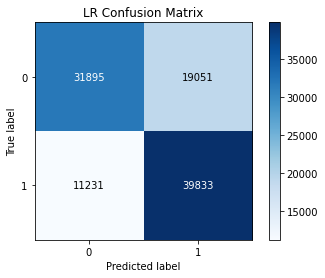

In [44]:
y_pred = lr_clf_model.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1: ", f1_score(y_test, y_pred))
print("ROC AUC: ", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

import scikitplot as skplt
fig = plt.figure(dpi = 100)
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.title('LR Confusion Matrix')
plt.savefig('graphs/lr_fs1/lr_confusion_matrix.png')

mean_stds = print_mean_std(acc,p,r,f,auc)

## Random Forest Classifier

In [45]:
rf_param_grid = {
                    'n_estimators':[200, 500, 800], 
                    'min_samples_split':[5, 15],
                    'max_depth': [70, 150, None]
                }

In [46]:
rf_clf = RandomForestClassifier()

In [47]:
rf_clf_search = HalvingGridSearchCV(rf_clf, rf_param_grid, cv=splits, factor=2, scoring='accuracy', verbose=3)

In [48]:
rf_clf_search.fit(X_train, y_train)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 25502
max_resources_: 408038
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 18
n_resources: 25502
Fitting 1 folds for each of 18 candidates, totalling 18 fits
[CV 1/1] END max_depth=70, min_samples_split=5, n_estimators=200; total time=   5.2s
[CV 1/1] END max_depth=70, min_samples_split=5, n_estimators=500; total time=  13.1s
[CV 1/1] END max_depth=70, min_samples_split=5, n_estimators=800; total time=  22.3s
[CV 1/1] END max_depth=70, min_samples_split=15, n_estimators=200; total time=   5.1s
[CV 1/1] END max_depth=70, min_samples_split=15, n_estimators=500; total time=  12.3s
[CV 1/1] END max_depth=70, min_samples_split=15, n_estimators=800; total time=  19.5s
[CV 1/1] END max_depth=150, min_samples_split=5, n_estimators=200; total time=   5.5s
[CV 1/1] END max_depth=150, min_samples_split=5, n_estimators=500; total time=  14.0s
[CV 1/1] END max_depth=150, min_samples_split=5,

HalvingGridSearchCV(cv=ShuffleSplit(n_splits=1, random_state=42, test_size=0.3, train_size=None),
                    estimator=RandomForestClassifier(), factor=2,
                    param_grid={'max_depth': [70, 150, None],
                                'min_samples_split': [5, 15],
                                'n_estimators': [200, 500, 800]},
                    refit=<function _refit_callable at 0x0000023DC6EF2EE0>,
                    scoring='accuracy', verbose=3)

In [49]:
rf_clf_search.best_params_

{'max_depth': 150, 'min_samples_split': 15, 'n_estimators': 800}

In [50]:
rf_clf_search.best_score_

0.782378890613512

In [51]:
rf_clf_model = rf_clf_search.best_estimator_

In [52]:
rf_clf_model

RandomForestClassifier(max_depth=150, min_samples_split=15, n_estimators=800)

### Evaluation

              precision    recall  f1-score   support

           0       0.84      0.72      0.78     50946
           1       0.76      0.86      0.81     51064

    accuracy                           0.79    102010
   macro avg       0.80      0.79      0.79    102010
weighted avg       0.80      0.79      0.79    102010

accuracy_mean, accuracy_std: 0.7926477796294481 0.0
precision_mean, precision_std, recall_mean, recall_std, f_mean, f_std: 0.7569406267179769 0.0 0.8628387905373649 0.0 0.8064279961929863 0.0
AUC_mean, AUC_std: 0.7925664921948395 0.0


<Figure size 600x400 with 0 Axes>

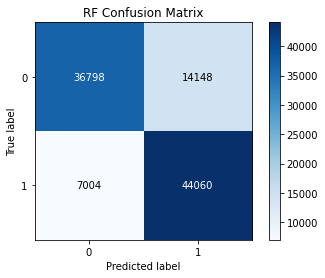

In [53]:
y_pred = rf_clf_model.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1: ", f1_score(y_test, y_pred))
print("ROC AUC: ", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

import scikitplot as skplt
fig = plt.figure(dpi = 100)
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.title('RF Confusion Matrix')
plt.savefig('graphs/rf_fs1/rf_confusion_matrix.png')

mean_stds = print_mean_std(acc,p,r,f,auc)

## XGBoost

In [23]:
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import warnings

In [24]:
def objective(space):
    warnings.filterwarnings(action='ignore', category=UserWarning)
    classifier = xgb.XGBClassifier(
                    objective = "binary:logistic",
                    eval_metric = "logloss",
                    booster = "gbtree",
                    tree_method = "hist",
                    grow_policy = "lossguide",
                    n_estimators = 300, 
                    max_depth = space['max_depth'],
                    learning_rate = space['learning_rate'],
                )
    
    classifier.fit(X_train, y_train)
    
    predicted_probs = classifier.predict_proba(X_test)

    logloss = log_loss(y_test, predicted_probs)

    print("Log loss = " + str(logloss))

    return{'loss':logloss, 'status': STATUS_OK }

In [25]:
space = {
    'max_depth' : hp.choice('max_depth', range(4, 10, 1)),
    "learning_rate": hp.quniform("learning_rate", 0.01, 0.5, 0.01)
}

In [26]:
trials = Trials()
best_param = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=5,
            trials=trials)

Log loss = 0.47049261206175047                                                                                         
Log loss = 0.46369033885779537                                                                                         
Log loss = 0.4603486103977277                                                                                          
Log loss = 0.4958769091283641                                                                                          
Log loss = 0.45824264134899145                                                                                         
100%|█████████████████████████████████████████████████| 5/5 [01:03<00:00, 12.74s/trial, best loss: 0.45824264134899145]


In [27]:
print("Best Param : ", best_param)

Best Param :  {'learning_rate': 0.09, 'max_depth': 5}


#### Training the model with the tuned parameters.

In [32]:
params = dict(
            objective = "binary:logistic",
            eval_metric = "logloss",
            booster = "gbtree",
            tree_method = "hist",
            grow_policy = "lossguide",
            max_depth = 5,
            eta = 0.09
        )

In [33]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_test, label=y_test)

In [34]:
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

In [35]:
xgb_model = xgb.train(params, dtrain, 1000, watchlist, early_stopping_rounds=20, verbose_eval=10)

[0]	train-logloss:0.66809	valid-logloss:0.66822
[10]	train-logloss:0.55132	valid-logloss:0.55254
[20]	train-logloss:0.51799	valid-logloss:0.51985
[30]	train-logloss:0.50571	valid-logloss:0.50803
[40]	train-logloss:0.50011	valid-logloss:0.50275
[50]	train-logloss:0.49699	valid-logloss:0.49979
[60]	train-logloss:0.49462	valid-logloss:0.49762
[70]	train-logloss:0.49236	valid-logloss:0.49560
[80]	train-logloss:0.49012	valid-logloss:0.49358
[90]	train-logloss:0.48858	valid-logloss:0.49227
[100]	train-logloss:0.48713	valid-logloss:0.49107
[110]	train-logloss:0.48583	valid-logloss:0.48997
[120]	train-logloss:0.48482	valid-logloss:0.48916
[130]	train-logloss:0.48386	valid-logloss:0.48835
[140]	train-logloss:0.48303	valid-logloss:0.48773
[150]	train-logloss:0.48213	valid-logloss:0.48701
[160]	train-logloss:0.48125	valid-logloss:0.48639
[170]	train-logloss:0.48047	valid-logloss:0.48582
[180]	train-logloss:0.47974	valid-logloss:0.48525
[190]	train-logloss:0.47897	valid-logloss:0.48472
[200]	train

### Evaluation

In [36]:
xgb_clf = xgb.XGBClassifier(
                    objective = "binary:logistic",
                    eval_metric = "logloss",
                    booster = "gbtree",
                    tree_method = "hist",
                    grow_policy = "lossguide",
                    n_estimators = 300, 
                    max_depth = '5',
                    learning_rate = '0.09',
                )
    
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, grow_policy='lossguide',
              importance_type='gain', interaction_constraints='',
              learning_rate='0.09', max_delta_step=0, max_depth='5',
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='hist', validate_parameters=1, verbosity=None)

Log Loss:  0.48075778631731303
Accuracy:  0.7535045583766298
Precision:  0.7140403323038301
Recall:  0.8466434278552405
F1:  0.7747085860712655
ROC AUC:  0.7533966952804252
              precision    recall  f1-score   support

           0       0.81      0.66      0.73     50946
           1       0.71      0.85      0.77     51064

    accuracy                           0.75    102010
   macro avg       0.76      0.75      0.75    102010
weighted avg       0.76      0.75      0.75    102010



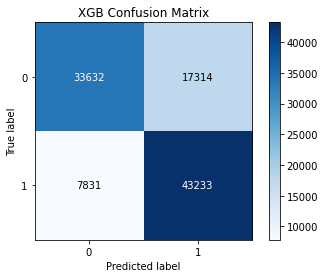

In [37]:
y_predicted_probs = xgb_clf.predict_proba(X_test)

y_pred = xgb_clf.predict(X_test)

print("Log Loss: ", log_loss(y_test, y_predicted_probs))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1: ", f1_score(y_test, y_pred))
print("ROC AUC: ", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.title('XGB Confusion Matrix')
plt.savefig('graphs/xgb_fs1/xgb_confusion_matrix.png')